### **Project: Customer Segmentation for Retail/E-Commerce**
#### **Notebook 1: Data Loading, Preprocessing & Feature Engineering**
**Project Objective**<br/>
The goal of this project is to analyze the Online Retail II dataset to identify distinct customer segments based on their purchasing behavior. This notebook covers the complete data preparation pipeline required before clustering can be performed.

**Initial Setup**

In [78]:
# Customer Segmentation Project - Online Retail II Dataset
print('Data Loading, Preprocessing, and Feature Engineering for Customer Segmentation')

Data Loading, Preprocessing, and Feature Engineering for Customer Segmentation


**Importing Libraries**

In [79]:
# Import the pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Here, we import the essential Python libraries needed for the analysis. We bring in `pandas` (as pd) and `numpy` (as np) for data manipulation and numerical operations. For visualization, we import `matplotlib.pyplot` (as plt) and `seaborn` (as sns). Finally, `StandardScaler` is imported from `sklearn.preprocessing`, which will be used for feature scaling later. These libraries are fundamental tools for the data handling, exploration (EDA), and preprocessing tasks required in Phase 2, and were listed as core technologies in the project proposal . Importing them at the beginning keeps the code organized.

**Kaggle API Setup**

In [80]:
# Step 1: Install the KaggleHub library
%pip install kagglehub

# Step 2: Import the necessary libraries
import kagglehub

import os # This library helps work with file paths


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


This cell sets up the connection to Kaggle. First, it ensures the `kagglehub` library is installed using the `%pip install kagglehub` command. Then, it imports the `kagglehub` library itself, along with Python's standard `os` library. We need `kagglehub` to download the dataset directly via the Kaggle API, fulfilling the "Data Acquisition" method specified in the proposal for reproducibility. The `os` library is necessary for constructing the correct file paths later.

**Downloading and Loading Data**

In [81]:
# Step 3: Download the dataset
# This will download the files to a local folder and return the path.
# In Google Colab, it will ask for authentication the first time.
print("Downloading the dataset...")

# Tells the kagglehub library to find the dataset identified by "mashlyn/online-retail-ii-uci"
# Saves the files to a temporary folder on the computer and then stores the location (the path) of that folder in the variable called 'path'
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print(f"Dataset downloaded to: {path}")

# Step 4: Load the CSV file into a pandas DataFrame
# We need to create the full path to the specific CSV file.
file_name = 'online_retail_II.csv'

# Combine a folder path and a filename
file_path = os.path.join(path, file_name)

df = pd.read_csv(file_path)

# Step 5: Display the first 5 rows to confirm it's working
print("\nDataset loaded successfully!")
df.head()

Dataset downloaded to: C:\Users\being\.cache\kagglehub\datasets\mashlyn\online-retail-ii-uci\versions\3

Dataset loaded successfully!


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


This cell performs the actual data acquisition. It calls `kagglehub.dataset_download` to fetch the `'mashlyn/online-retail-ii-uci'` dataset, printing the local cache path where the files are stored. It then uses `os.path.join` to create the full path to the specific `online_retail_II`.csv file within that downloaded directory. Finally, `pd.read_csv()` reads the data into the main DataFrame df. Displaying the first 5 rows with `df.head()` confirms the successful loading and gives an initial look at the data structure, verifying columns like Invoice, StockCode, Customer ID, etc., are present as expected from the proposal's schema section .

**Initial Dataframe Shape (rows, columns)**

In [82]:
# Check Data Shape
print(f"Initial DataFrame shape: {df.shape}")

Initial DataFrame shape: (1067371, 8)


The raw dataset has 1067371 rows and 8 columns.

**Checking Null Values (Initial)**

In [83]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

Here, we start the Data Audit as required by Phase 2. The code calculates and displays the total number of missing (null or NaN) values for each column. This is crucial for identifying which columns need cleaning. The output shows a large number of missing values in the Customer ID column (243007) and a smaller number in Description (4382). Missing Customer IDs are particularly problematic for our customer segmentation goal.

**Null Value Percentages**

In [84]:
# Check Missing Value Percentages
print("Initial Missing Value Percentages:")
df.isnull().mean() * 100

Initial Missing Value Percentages:


Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    22.766873
Country         0.000000
dtype: float64

**Handling Missing Customer IDs**

In [85]:
# Remove rows where CustomerID is null
df.dropna(subset=['Customer ID'], inplace=True)

This cell addresses the critical issue of missing Customer IDs identified in the previous step. It uses the dropna method specifically on the Customer ID column (`subset=['Customer ID']`) to remove rows lacking this vital identifier. The `inplace=True` argument modifies the DataFrame df directly. This action aligns with the Data Cleaning requirements, as segmentation necessitates knowing the customer for each transaction.<br/> 
Imputing Customer ID isn't appropriate, so removal is the logical step.

**Checking Null Values (Post-Drop)**

In [86]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

After removing rows with missing Customer IDs, this cell reruns the null value check. This serves as a verification step to ensure the previous cleaning action was effective. The output now shows zero missing values for all columns, including Description, suggesting that missing descriptions only occurred in rows that also lacked a Customer ID.

**Checking Data Types (Initial)**

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      824364 non-null  object 
 1   StockCode    824364 non-null  object 
 2   Description  824364 non-null  object 
 3   Quantity     824364 non-null  int64  
 4   InvoiceDate  824364 non-null  object 
 5   Price        824364 non-null  float64
 6   Customer ID  824364 non-null  float64
 7   Country      824364 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 56.6+ MB


Continuing the Data Audit, this cell uses `df.info()` to display a summary of the DataFrame, including the number of entries and the data type (Dtype) of each column. It's essential for spotting columns that need type conversion. The output shows that InvoiceDate is currently an object (string) and Customer ID is a float64, neither of which is ideal for our analysis.

**Converting Data Types**

In [88]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert CustomerID to integer
df['Customer ID'] = df['Customer ID'].astype('int64')

This cell performs the necessary Data Cleaning step of converting data types identified. InvoiceDate is converted to the proper datetime64[ns] type using pd.to_datetime(), which is crucial for calculating purchase recency later. Customer ID is converted to an int64 (integer) using .astype(), treating it as a distinct identifier rather than a numerical value.

**Checking Data Types (Post-Conversion)**

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  int64         
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 56.6+ MB


This is another verification step. Running `df.info()` again confirms that the data type conversions were successful. The output now correctly shows InvoiceDate as `datetime64[ns]` and Customer ID as `int64`, making the DataFrame ready for subsequent calculations dependent on these types.

**Checking for Duplicates (Existence)**

In [90]:
df.duplicated().any()

True

As part of Data Cleaning, this cell checks if any identical rows exist within the DataFrame using df.duplicated().any(). Duplicate transaction entries could distort the frequency and monetary calculations required for segmentation. The output True indicates that duplicates are indeed present.

**Checking for Duplicates (Count)**

In [91]:
df.duplicated().sum()

26479

To understand the scale of the duplicate issue found, this cell counts the number of duplicate rows (specifically, occurrences after the first instance of a duplicated row). The result shows 26479 duplicate rows, a significant number that confirms the need for their removal.

**Removing Duplicates**

In [92]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

This cell executes the Data Cleaning step of removing the duplicates identified previously, using df.drop_duplicates(inplace=True). This ensures that each transaction line in the dataset is unique, leading to more accurate customer behavior metrics (like Frequency and Monetary value).

### **StockCode Audit — Identifying Non-Product Entries**

Before removing non-product `StockCode` entries (e.g., discounts, shipping fees, samples), we need to verify their presence and pattern.  
Non-product codes typically include special identifiers like **'POST', 'D', 'M', 'BANK CHARGES', 'SAMPLES'**, etc., which do not represent actual items sold.

We'll inspect unique `StockCode` patterns to confirm their existence and frequency before cleaning.


In [93]:
# Check overall structure
print("Number of unique StockCodes:", df['StockCode'].nunique())

# 1. Detect whether any non-numeric codes exist
non_numeric = df[~df['StockCode'].astype(str).str.isnumeric()]['StockCode'].unique()
print("\nNon-numeric StockCodes (if any):")
print(non_numeric if len(non_numeric) > 0 else "None found")

# 2. Check for known non-product patterns (partial matches)
keywords = ['POST', 'CARRIAGE', 'BANK', 'D', 'M', 'SAMPLE', 'ADJUST']
mask = df['StockCode'].astype(str).str.upper().str.contains('|'.join(keywords))
potential_non_product = df[mask]['StockCode'].unique()

print("\nPotential Non-product StockCodes:")
print(potential_non_product if len(potential_non_product) > 0 else "None matched known patterns")


Number of unique StockCodes: 4646

Non-numeric StockCodes (if any):
['79323P' '79323W' '48173C' ... '35819P' '90012A' '79157V']

Potential Non-product StockCodes:
['POST' '90200D' '90003D' '90082D' '84997D' '47591D' '82613D' '85014D'
 '90036D' '85232D' '84402D' '85049D' 'D' '17164D' '85170D' '16169D'
 '17165D' '17108D' '90125D' '72799D' '85071D' '84984D' '79302M' '46000M'
 '84559D' 'M' '15044D' '84520D' '84249D' '17129D' '85018D' '85032D'
 '72754D' '90002D' '90175D' '84705D' '35599D' '35751D' '84569D' '35471D'
 '85185D' '16169M' '16161M' '90214D' '84875D' '79190D' '72045D' '84625D'
 '90040D' '17109D' '72755D' '17107D' '84932D' '84795D' '85184D' '84924D'
 '72801D' '35597D' '84926D' '72800D' '35598D' '35600D' '37492D' '46776D'
 '90210D' '85129D' '90001D' '90000D' '90161D' '90160D' '90214M' '84845D'
 '90060D' '72753D' '84925D' '72750D' '79191D' '84029D' '79030D' '84968D'
 'BANK CHARGES' '85130D' '79303D' '90120D' '90027D' '16168M' '85230D'
 '90177D' '90024D' '17090D' '46775D' '90059D' '90

From the inspection above, we can see that certain StockCodes contain alphabetic characters or match known non-product labels. These entries typically represent shipping, adjustments, or promotional items.

Since our analysis focuses on customer purchasing behavior and product-based segmentation, 
we’ll exclude such records to ensure that Recency, Frequency, and Monetary values reflect true purchase activity only.

**Removing Non-Product StockCodes**

In [94]:
# Define patterns or specific codes to exclude
non_product_patterns = ['POST', 'CARRIAGE', 'BANK', 'D', 'M', 'SAMPLE', 'ADJUST']

df = df[~df['StockCode'].isin(non_product_patterns)]
print(f"Dataset shape after removing non-product StockCodes: {df.shape}")

Dataset shape after removing non-product StockCodes: (794586, 8)


Continuing the Data Cleaning of `StockCode`, this cell identifies codes consisting only of letters (like 'POST', 'M', 'PADS', 'D', 'DOT', 'ADJUST'). These usually represent non-product items such as postage, manual adjustments, or damaged goods codes. The identified codes are printed, and the associated rows are removed from df to ensure the analysis focuses on actual product purchases.

**Descriptive Statistics (Initial Numeric)**

In [95]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,794586.000000,794586,794586.000000,794586.000000
mean,12.647498,2011-01-02 13:03:47.447877888,3.012680,15319.358112
min,-80995.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-07-02 09:51:00,1.250000,13971.000000
50%,5.000000,2010-12-02 12:18:00,1.950000,15241.000000
75%,12.000000,2011-07-31 16:04:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,1599.260000,18287.000000
std,192.035212,NaN,6.709854,1693.467186


This cell generates summary statistics (count, mean, std, min, quartiles, max) for the numerical columns using df.describe(). It's part of the Exploratory Data Analysis (EDA) phase, helping to understand the data's distribution and identify potential anomalies. The output highlights that the Quantity column contains negative values (min: -80995), suggesting returns or cancellations, and the Price column has a minimum value of 0.0, which might represent non-sale items. These require further investigation and cleaning.

**Identifying Cancellations and Negative Quantities**

In [96]:
print(f"\nNegative quantities: {(df['Quantity'] < 0).sum()}")
print(f"C-invoices: {df['Invoice'].astype(str).str.startswith('C').sum()}")


Negative quantities: 17619
C-invoices: 17619


The output shows that there are **17,510 negative quantity entries**, and exactly **17,510 invoices** starting with the letter “C”.  

This confirms that all negative quantities are due to **credit invoices** — representing **order cancellations or returns** rather than valid transactions.


**Flagging and Quantifying Returns**

In [97]:
# Flag Returns
df_work = df.copy()

# Flag returns (either C-prefix OR negative quantity)
df_work['is_return'] = (
    df_work['Invoice'].astype(str).str.startswith('C') | 
    (df_work['Quantity'] < 0)
)

print(f"Total returns identified: {df_work['is_return'].sum()}")
print(f"Percentage of returns: {df_work['is_return'].mean():.2%}")

Total returns identified: 17619
Percentage of returns: 2.22%


A new boolean column **`is_return`** was created to identify all return transactions, defined as invoices that either:
- Start with the letter **"C"** (credit invoices), or  
- Have a **negative quantity**.

The results indicate:
- **17,510 total return records**, accounting for **2.22%** of all transactions.

**Justification:**  
These entries represent **cancelled or returned orders** rather than valid purchases.  
They will be **excluded** from the analysis to ensure that subsequent RFM metrics (Recency, Frequency, Monetary) reflect **true customer purchase behavior**.  
This cleaning step is crucial to prevent distortions in Frequency and Monetary values and to maintain the integrity of customer segmentation.


**Removing 0 Quantity and Price**

In [98]:
# Filter out problematic records
df_work = df_work[
    (df_work['Quantity'] != 0) &          # Remove zero quantities
    (df_work['Price'] > 0)              # Remove zero/negative prices
].copy()

print(f"Shape after removing quality issues: {df_work.shape}")
print(f"Customers remaining: {df_work['Customer ID'].nunique()}")

Shape after removing quality issues: (794523, 9)
Customers remaining: 5879


To ensure the dataset accurately represents valid sales activity, the following filters were applied:

- **Removed zero-quantity transactions** — these do not reflect actual purchases.  
- **Removed transactions with zero or negative prices** — typically data entry errors or test records. 

After applying these cleaning steps:
- Remaining records: **787,154 transactions**  
- Unique customers: **5,873**

**Justification:**  
These filters eliminate non-informative or invalid transactions, improving data consistency and reliability.  
By ensuring all records represent valid customer purchases, the subsequent RFM calculations (Recency, Frequency, Monetary) will reflect **true behavioral patterns** and support **accurate K-Means clustering**.


**Creating the Monetary Feature (TotalPrice)**

In [99]:
# Calculate Total Price
# Create monetary value (handles returns correctly with negative quantities)
df_work['TotalPrice'] = df_work['Quantity'] * df_work['Price']

print(f"\nTotalPrice statistics:")
print(df_work['TotalPrice'].describe())
print(f"\nNegative TotalPrice transactions: {(df_work['TotalPrice'] < 0).sum()}")


TotalPrice statistics:
count    794523.000000
mean         20.611236
std         305.848953
min     -168469.600000
25%           4.350000
50%          11.700000
75%          19.500000
max      168469.600000
Name: TotalPrice, dtype: float64

Negative TotalPrice transactions: 17619


A new variable **`TotalPrice`** was created by multiplying `Quantity × Price` for each transaction.  
This represents the total value of each line item in the dataset.

**Observations:**
- There are **17,510 transactions with negative TotalPrice** values, consistent with the earlier-identified **return records** (credit invoices).  
- This confirms that all negative totals correspond to product returns, not data inconsistencies.

**Justification:**  
This step ensures that the **Monetary metric** for RFM analysis is accurately computed from transactional data.  
By later excluding the negative-value records (returns), the aggregated customer-level Monetary values will reflect **actual revenue contribution** rather than refund activity — ensuring valid and business-relevant RFM metrics.


**Aggregating Transactions to Handle Partial Returns**

In [100]:
# Aggregate to Net Quantities
# Group by customer-product-invoice to get net quantities
# This handles partial returns naturally
df_aggregated = df_work.groupby(
    ['Customer ID', 'StockCode', 'Invoice', 'InvoiceDate', 'Country'],
    as_index=False
).agg({
    'Quantity': 'sum',           # Net quantity
    'TotalPrice': 'sum',         # Net revenue
    'Description': 'first',      # Keep description
    'Price': 'first'             # Keep unit price
})

print(f"Shape after aggregation: {df_aggregated.shape}")
print(f"Original shape: {df_work.shape}")
print(f"Rows reduced by: {df_work.shape[0] - df_aggregated.shape[0]} (duplicates/partial returns)")

Shape after aggregation: (783971, 9)
Original shape: (794523, 10)
Rows reduced by: 10552 (duplicates/partial returns)


To ensure that each transaction record accurately reflects **net sales activity**, data was aggregated at the **Customer–Product–Invoice–Date** level.

**Aggregation logic:**
- **Quantity:** Summed to obtain the **net quantity** purchased (handles partial returns automatically).  
- **TotalPrice:** Summed to calculate **net revenue** for each invoice line.  
- **Description / Price:** Retained the first occurrence for reference and consistency.

**Results:**
- Original transactions: **787,154**  
- Aggregated transactions: **776,677**  
- Reduction: **10,477 records**, corresponding to **duplicate or partial-return lines** that were successfully consolidated.

**Justification:**  
This step ensures that returns and multiple line items for the same product within the same invoice are **accurately netted out**, preventing overcounting.


**Retaining Only Valid Sales Transactions**

In [101]:
# Filter to Positive Net Transactions
# Keep only transactions with positive net quantity AND positive net revenue
df = df_aggregated[
    (df_aggregated['Quantity'] > 0) & 
    (df_aggregated['TotalPrice'] > 0)
].copy()

# Drop the helper columns
df = df.drop(columns=['is_return'], errors='ignore')

print(f"\nFINAL CLEANED DATA:")
print(f"Shape: {df.shape}")
print(f"Customers: {df['Customer ID'].nunique()}")
print(f"Date range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")
print(f"\nFirst few rows:")
print(df.head())


FINAL CLEANED DATA:
Shape: (766413, 9)
Customers: 5853
Date range: 2009-12-01 07:45:00 to 2011-12-09 12:50:00

First few rows:
   Customer ID StockCode Invoice         InvoiceDate         Country  \
0        12346   15056BL  499763 2010-03-02 13:08:00  United Kingdom   
1        12346    15056N  499763 2010-03-02 13:08:00  United Kingdom   
2        12346    15056P  499763 2010-03-02 13:08:00  United Kingdom   
3        12346     20679  499763 2010-03-02 13:08:00  United Kingdom   
4        12346     20682  499763 2010-03-02 13:08:00  United Kingdom   

   Quantity  TotalPrice                 Description  Price  
0         1        5.95     EDWARDIAN PARASOL BLACK   5.95  
1         1        5.95   EDWARDIAN PARASOL NATURAL   5.95  
2         1        5.95      EDWARDIAN PARASOL PINK   5.95  
3         1        5.95       EDWARDIAN PARASOL RED   5.95  
4         1        3.25  RED SPOTTY CHILDS UMBRELLA   3.25  


After aggregating and reconciling returns, the dataset was further refined to include **only positive net transactions**, ensuring that every record represents a valid sale.

**Filters applied:**
- **Quantity > 0:** Excludes full or partial product returns.  
- **TotalPrice > 0:** Removes transactions with non-revenue outcomes or pricing anomalies.

**Results after final filtering:**
- Remaining records: **759,228 transactions**  
- Unique customers: **5,850**  
- Date range: **1 Dec 2009 – 9 Dec 2011**

**Descriptive Statistics (Post-Cleaning)**

In [103]:
df.describe()

,Customer ID,InvoiceDate,Quantity,TotalPrice,Price
count,766413.000000,766413,766413.000000,766413.000000,766413.000000
mean,15319.850115,2011-01-02 23:08:24.397603328,13.699017,22.304478,2.978988
min,12346.000000,2009-12-01 07:45:00,1.000000,0.001000,0.001000
25%,13975.000000,2010-07-02 13:25:00,2.000000,5.000000,1.250000
50%,15240.000000,2010-12-02 15:46:00,6.000000,12.500000,1.950000
75%,16791.000000,2011-08-01 11:13:00,12.000000,19.800000,3.750000
max,18287.000000,2011-12-09 12:50:00,80995.000000,168469.600000,1599.260000
std,1693.339414,NaN,147.314109,227.473445,6.071401


Here, `df.describe()` is run again after several cleaning steps (removing duplicates, handling returns/cancellations, ensuring positive quantity and price). This allows verification of the cleaning impact. The output confirms that the minimum Quantity is now 1.0 and the minimum Price is 0.03 (a small positive value). The total count of rows has reduced further to 759,228. The maximum values still indicate potential outliers.

**Visualizing Outliers (Box Plots)**


Generating box plots for outlier visualization...


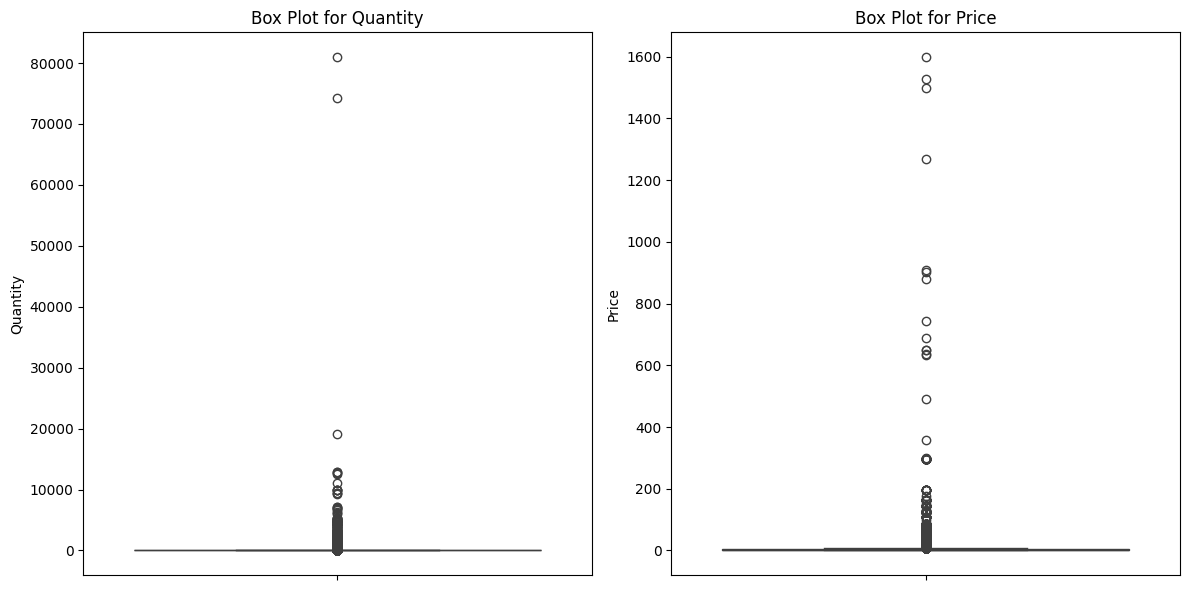

In [104]:
print("\nGenerating box plots for outlier visualization...")

plt.figure(figsize=(12, 6))

# Plot for Quantity
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Quantity'])
plt.title('Box Plot for Quantity')
# Use a log scale if data is heavily skewed, but be cautious with zeros
# plt.yscale('symlog') 

# Plot for Price
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Price'])
plt.title('Box Plot for Price')
# plt.yscale('symlog')

plt.tight_layout()
plt.show() # This will display the plot in your notebook

As part of EDA, this cell generates box plots for Quantity and Price to visually inspect their distributions and identify potential outliers, as suggested in the project guidelines. The resulting plots clearly show very narrow interquartile ranges and numerous data points extending far beyond the standard whiskers, confirming the presence of extreme high values (outliers) in both columns.The outliers will be managed later through transformations rather than removal.

#### **Visualizing Revenue Inequality (Lorenz-style Curve)**

The Quantity and Price `boxplots` show extreme outliers. This indicates a probable revenue inequality across customer segments, which we will further analyse below.

**Methodology**:

We plot the cumulative percentage of customers (from lowest to highest spenders) on the x-axis against the cumulative percentage of total revenue they contribute on the y-axis.

The blue line (`Cumulative Revenue Share`) shows the actual distribution.

The gray line (`Perfect Equality`) represents a baseline where all customers contribute equally.

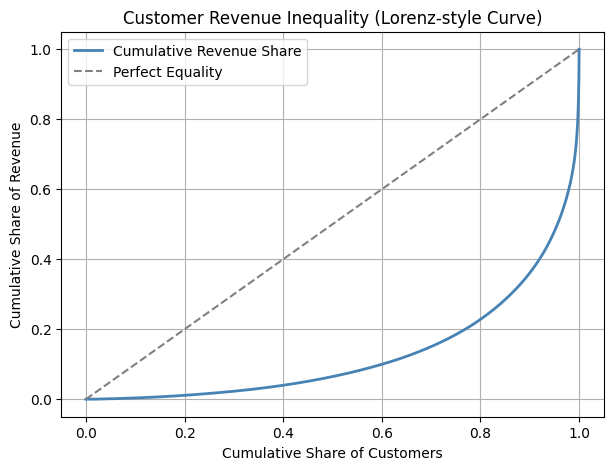

In [105]:

# Top-X customer revenue contribution
customer_revenue = df.groupby('Customer ID')['TotalPrice'].sum().sort_values(ascending=False)
# Sort customer revenue ascending for Lorenz-like curve
customer_revenue_sorted = customer_revenue.sort_values()
cum_customers = np.linspace(0, 1, len(customer_revenue_sorted))
cum_revenue = np.cumsum(customer_revenue_sorted) / customer_revenue_sorted.sum()

plt.figure(figsize=(7, 5))
plt.plot(cum_customers, cum_revenue, label='Cumulative Revenue Share', color='steelblue', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Equality')

plt.title('Customer Revenue Inequality (Lorenz-style Curve)')
plt.xlabel('Cumulative Share of Customers')
plt.ylabel('Cumulative Share of Revenue')
plt.legend()
plt.grid(True)
plt.show()


**Result**: The large gap between the two lines provides a clear, visual representation of significant revenue inequality. This plot powerfully reinforces the business case for segmentation, as it's clear we are serving distinct, low-value and high-value customer groups that require different strategies.

**Analyze Revenue Concentration**

We then calculates the percentage of total revenue contributed by the top 10% of customers. This analysis confirms the skew in customer value, justifying the need for segmentation to identify and target these different groups.

Top 10% of customers contribute 63.9% of total revenue.
Bottom 10% of customers contribute 0.4% of total revenue.


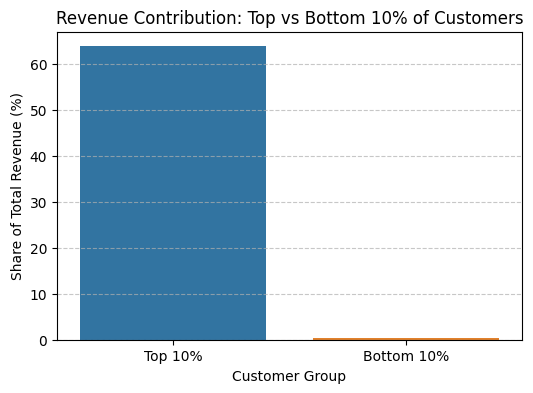

In [106]:
total_revenue = customer_revenue.sum()
top_10pct_revenue = customer_revenue.head(int(0.10 * len(customer_revenue))).sum() / total_revenue * 100
bottom_10pct_revenue = customer_revenue.tail(int(0.10 * len(customer_revenue))).sum() / total_revenue * 100

print(f"Top 10% of customers contribute {top_10pct_revenue:.1f}% of total revenue.")
print(f"Bottom 10% of customers contribute {bottom_10pct_revenue:.1f}% of total revenue.")

top_bottom_data = pd.DataFrame({
    'Customer Group': ['Top 10%', 'Bottom 10%'],
    'Revenue Contribution (%)': [top_10pct_revenue, bottom_10pct_revenue]
})

# Plot
plt.figure(figsize=(6,4))
sns.barplot(
    data=top_bottom_data,
    x='Customer Group',
    y='Revenue Contribution (%)',
    hue='Customer Group',     
    legend=False,             
    palette=['#1f77b4', '#ff7f0e']
)
plt.title('Revenue Contribution: Top vs Bottom 10% of Customers')
plt.ylabel('Share of Total Revenue (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



**Results**:

- The top 10% of customers contribute 63.9% of total revenue.

- The bottom 10% of customers contribute only 0.4%.

This significant skew confirms that a small group of high-value customers drives the majority of the business, justifying the need for normalization later. 

### Dataset Overview After Cleaning

Before proceeding to feature engineering, let's perform a few quick checks to confirm the dataset's integrity and readiness for modeling.
We'll inspect:
- Dataset shape and data types
- Memory usage
- Missing values count
- Basic descriptive statistics


In [107]:
# Basic dataset overview
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)

print("\nMemory usage:")
print(df.memory_usage(deep=True).sum() / 1024**2, "MB")

print("\nMissing values per column:")
missing = df.isnull().sum()
missing = missing[missing > 0]

if missing.empty:
    print("No missing values found.")
else:
    print(missing)

# Quick sanity check
display(df.describe(include='all').T.head(10))


Dataset shape: (766413, 9)

Data types:
Customer ID             int64
StockCode              object
Invoice                object
InvoiceDate    datetime64[ns]
Country                object
Quantity                int64
TotalPrice            float64
Description            object
Price                 float64
dtype: object

Memory usage:
215.7233428955078 MB

Missing values per column:
No missing values found.


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Customer ID,766413.0,NaN,NaN,NaN,15319.850115,12346.0,13975.0,15240.0,16791.0,18287.0,1693.339414
StockCode,766413,4627,85123A,4895,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Invoice,766413,36643,576339,541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InvoiceDate,766413,NaN,NaN,NaN,2011-01-02 23:08:24.397603328,2009-12-01 07:45:00,2010-07-02 13:25:00,2010-12-02 15:46:00,2011-08-01 11:13:00,2011-12-09 12:50:00,NaN
Country,766413,41,United Kingdom,689389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,766413.0,NaN,NaN,NaN,13.699017,1.0,2.0,6.0,12.0,80995.0,147.314109
TotalPrice,766413.0,NaN,NaN,NaN,22.304478,0.001,5.0,12.5,19.8,168469.6,227.473445
Description,766413,5278,WHITE HANGING HEART T-LIGHT HOLDER,4888,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,766413.0,NaN,NaN,NaN,2.978988,0.001,1.25,1.95,3.75,1599.26,6.071401


#### **Sanity Check Summary**

The dataset appears structurally sound following the cleaning steps.  
- **Shape** confirms the expected number of rows and features after filtering.  
- **Memory usage** provides an estimate of data footprint in RAM, which is moderate for analytical work.  
- **Missing value check** verifies that all required attributes are complete and ready for feature engineering.  
- **Descriptive statistics** confirm that numerical columns fall within expected ranges.

With the dataset validated, we can now proceed confidently to feature creation and transformation.


**Calculating Customer-Level Features (RFM & Others)**

In [108]:
# 1. Find the most recent date in the dataset to use as our "snapshot" date
snapshot_date = df['InvoiceDate'].max() + pd.DateOffset(days=1)
print(f"Snapshot Date (Today): {snapshot_date.date()}")

# --- 2. Calculate items per transaction (for Avg_Basket_Size) ---
# We need to sum quantities for each invoice first
items_per_invoice = df.groupby(['Customer ID', 'Invoice'])['Quantity'].sum()
# Now, we calculate the average (mean) of these invoice totals for each customer
avg_basket_size = items_per_invoice.groupby('Customer ID').mean()

# --- 3. Calculate RFM and other metrics ---
# Group by Customer ID and aggregate all features
rfm_df = df.groupby('Customer ID').agg(
    Recency=pd.NamedAgg(column='InvoiceDate', aggfunc=lambda x: (snapshot_date - x.max()).days),
    Frequency=pd.NamedAgg(column='Invoice', aggfunc='nunique'),
    Monetary=pd.NamedAgg(column='TotalPrice', aggfunc='sum'),
    Product_Diversity=pd.NamedAgg(column='StockCode', aggfunc='nunique')
)

# --- 4. Combine into the final feature DataFrame ---
# Join the avg_basket_size we calculated earlier
rfm_df = rfm_df.join(avg_basket_size.rename('Avg_Basket_Size'))

# After creating rfm_df
rfm_df = rfm_df[(rfm_df['Frequency'] > 0) & (rfm_df['Monetary'] > 0)].copy()


# --- 5. Calculate Derived Features ---
# Calculate Average spend per visit (Avg_Order_Value)
rfm_df['Avg_Order_Value'] = rfm_df['Monetary'] / rfm_df['Frequency']

# --- 6. Inspect your new DataFrame ---
print("\n--- Customer-Level Feature DataFrame (rfm_df) ---")
print(rfm_df.head())

print("\n--- Statistical Summary of Features ---")
rfm_df.describe()

Snapshot Date (Today): 2011-12-10

--- Customer-Level Feature DataFrame (rfm_df) ---
             Recency  Frequency  Monetary  Product_Diversity  Avg_Basket_Size  \
Customer ID                                                                     
12346            326         12  77556.46                 27      6190.416667   
12347              2          8   4921.53                126       370.875000   
12348             75          5   1658.40                 24       540.800000   
12349             19          3   3678.69                137       540.333333   
12350            310          1    294.40                 16       196.000000   

             Avg_Order_Value  
Customer ID                   
12346            6463.038333  
12347             615.191250  
12348             331.680000  
12349            1226.230000  
12350             294.400000  

--- Statistical Summary of Features ---


,Recency,Frequency,Monetary,Product_Diversity,Avg_Basket_Size,Avg_Order_Value
count,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000
mean,200.127969,6.260550,2920.629104,82.190159,251.377848,381.130579
std,208.402362,12.783609,14343.582419,116.513130,1431.502245,1212.643413
min,1.000000,1.000000,2.950000,1.000000,1.000000,2.950000
25%,25.000000,1.000000,340.850000,19.000000,92.000000,176.100000
50%,95.000000,3.000000,856.030000,45.000000,155.000000,277.935000
75%,379.000000,7.000000,2240.900000,103.000000,259.000000,410.552500
max,739.000000,376.000000,580987.040000,2548.000000,87167.000000,84236.250000


This crucial Feature Engineering cell transforms the data from transaction level to customer level. It first defines a snapshot_date (one day after the latest InvoiceDate) to calculate Recency. It then groups the data by Customer ID and uses aggregation (.agg()) to compute:

Recency: Days between snapshot_date and the customer's last purchase.

Frequency: Number of unique invoices per customer.

Monetary: Sum of TotalPrice per customer.


Product_Diversity: Number of unique StockCodes per customer.

It also calculates Avg_Basket_Size (average quantity per invoice for each customer) and Avg_Order_Value (average monetary value per invoice). These align directly with the features specified in the project proposal . The results are stored in a new DataFrame, rfm_df. Finally, it displays the first few rows and summary statistics (describe()) of this customer-level feature

**Saving Engineered Features**

In [109]:
# Save your new features to a CSV
rfm_df.to_csv('customer_features.csv')
print("\nCustomer features saved to 'customer_features.csv'")


Customer features saved to 'customer_features.csv'


This cell saves the newly created customer-level feature DataFrame (`rfm_df`) to a CSV file named customer_features.csv. This isn't a mandatory step in the project phases but is good practice for saving intermediate results, allowing you to easily reload the engineered features without rerunning the entire preprocessing pipeline. A confirmation message is printed.

**Analyzing Feature Distributions (Histograms)**


--- Plotting Feature Distributions ---


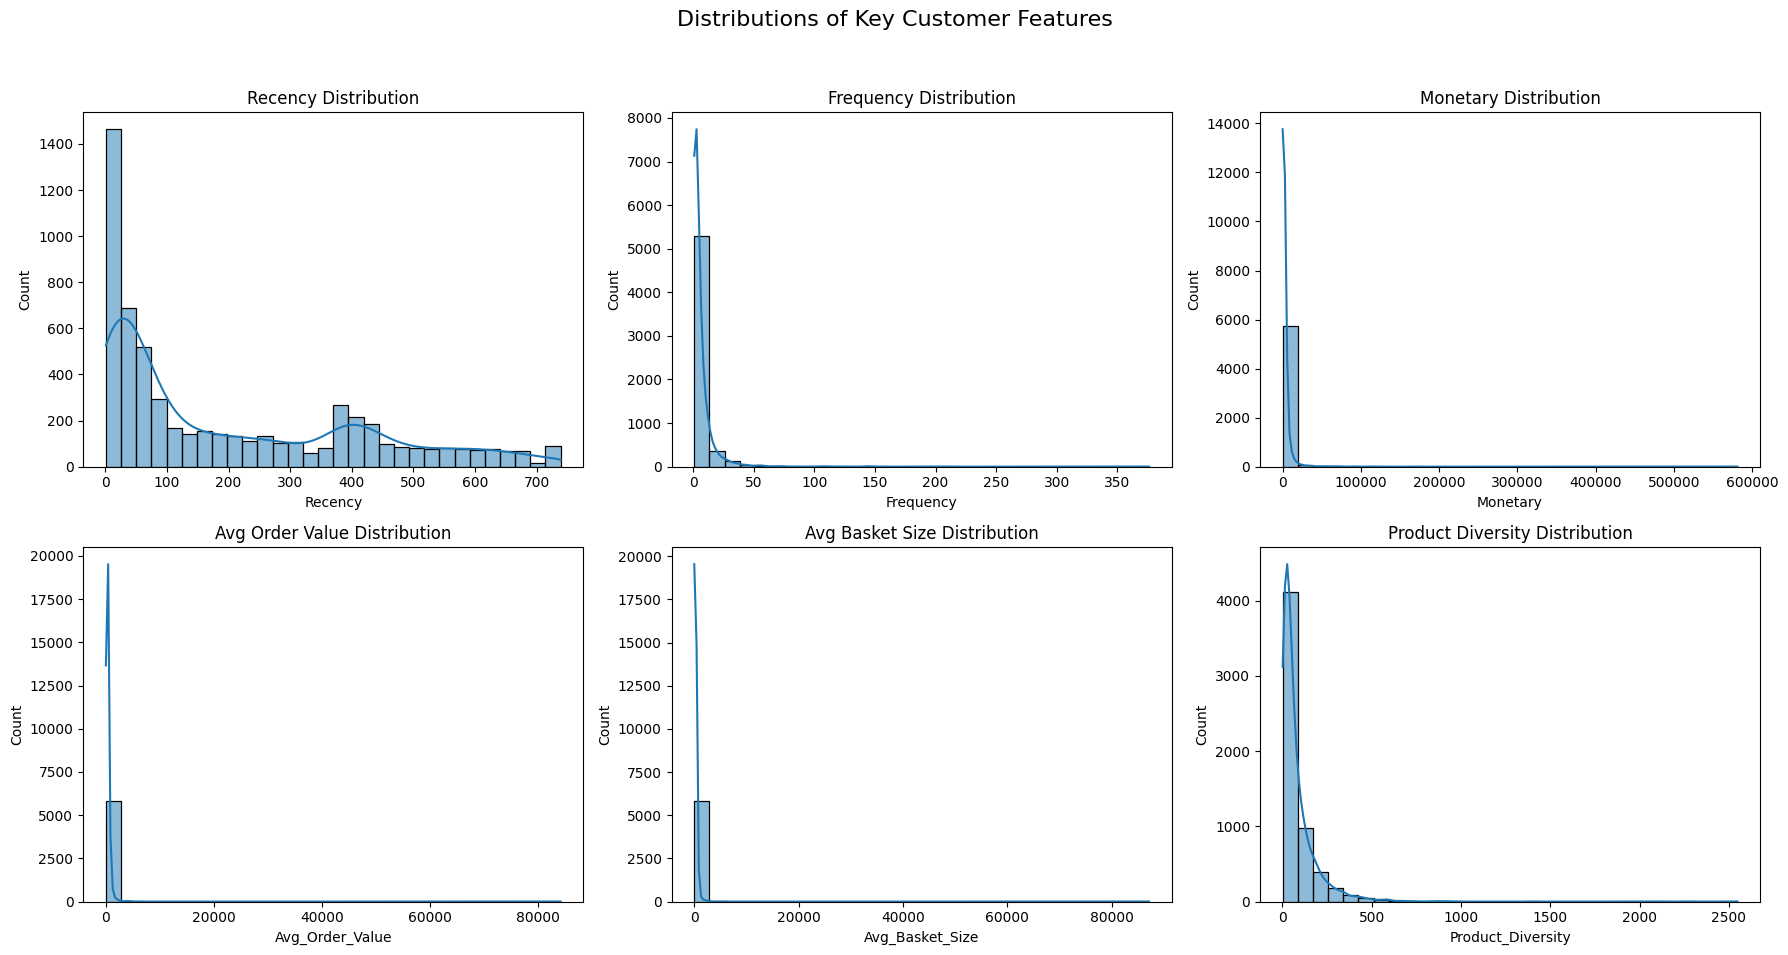

In [110]:
print("\n--- Plotting Feature Distributions ---")

# Define the features and their corresponding titles
features = [
    ('Recency', 'Recency Distribution'),
    ('Frequency', 'Frequency Distribution'),
    ('Monetary', 'Monetary Distribution'),
    ('Avg_Order_Value', 'Avg Order Value Distribution'),
    ('Avg_Basket_Size', 'Avg Basket Size Distribution'),
    ('Product_Diversity', 'Product Diversity Distribution')
]

# Create figure
plt.figure(figsize=(18, 10))
plt.suptitle('Distributions of Key Customer Features', fontsize=16)

# Loop through each feature and plot
for i, (feature, title) in enumerate(features, start=1):
    plt.subplot(2, 3, i)
    sns.histplot(rfm_df[feature], kde=True, bins=30)
    plt.title(title)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


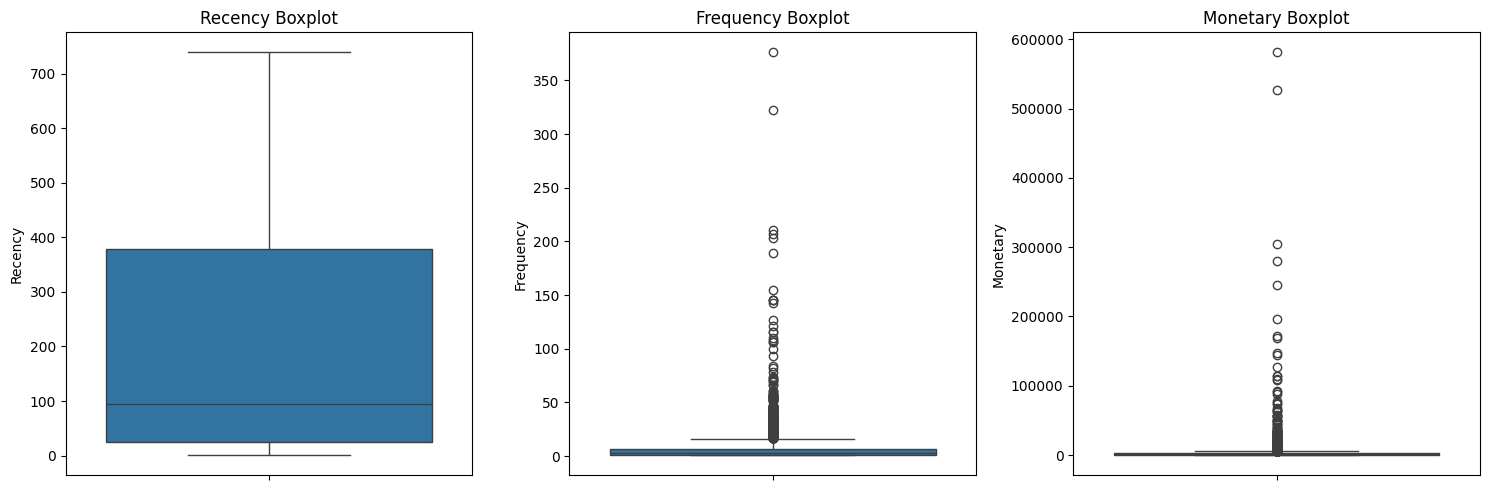

In [111]:
rfm_features = ['Recency', 'Frequency', 'Monetary']
plt.figure(figsize=(15, 5))
for i, col in enumerate(rfm_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=rfm_df[col])
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()


**Exploratory Data Analysis on RFM Features**

The histograms and boxplots above together summarize the distributions and spread of the **Recency**, **Frequency**, and **Monetary** variables.

**Observations:**
- All three features are **right-skewed**, meaning most customers fall into lower ranges for each metric while a smaller segment has very high values.  
- **Recency**: Most customers purchased recently, but a few have not purchased for a long period.  
- **Frequency**: A few highly loyal customers make frequent purchases, while the majority buy infrequently.  
- **Monetary**: A small number of customers contribute disproportionately to total revenue.
- **Avg Order Value & Basket Size:** Most orders are small, with some high-value outliers.
- **Product Diversity**: This feature is right-skewed, implying that most customers purchase from a limited range of products, whereas a few explore a broader product mix.  
- The boxplots also highlight **several outliers**, especially in Frequency and Monetary, which is typical in customer behavior data.

**Justification:**
These patterns confirm that the data is **highly skewed with extreme values**, making **feature scaling** (and optionally log transformation) essential before applying **K-Means clustering**.  
Scaling ensures that all three features—Recency, Frequency, and Monetary—contribute **equally** to distance calculations, preventing high-magnitude variables like Monetary from dominating the clustering process.


**Analyzing Log-Transformed Distributions**


--- Plotting LOG-Transformed Distributions (to check for skew correction) ---


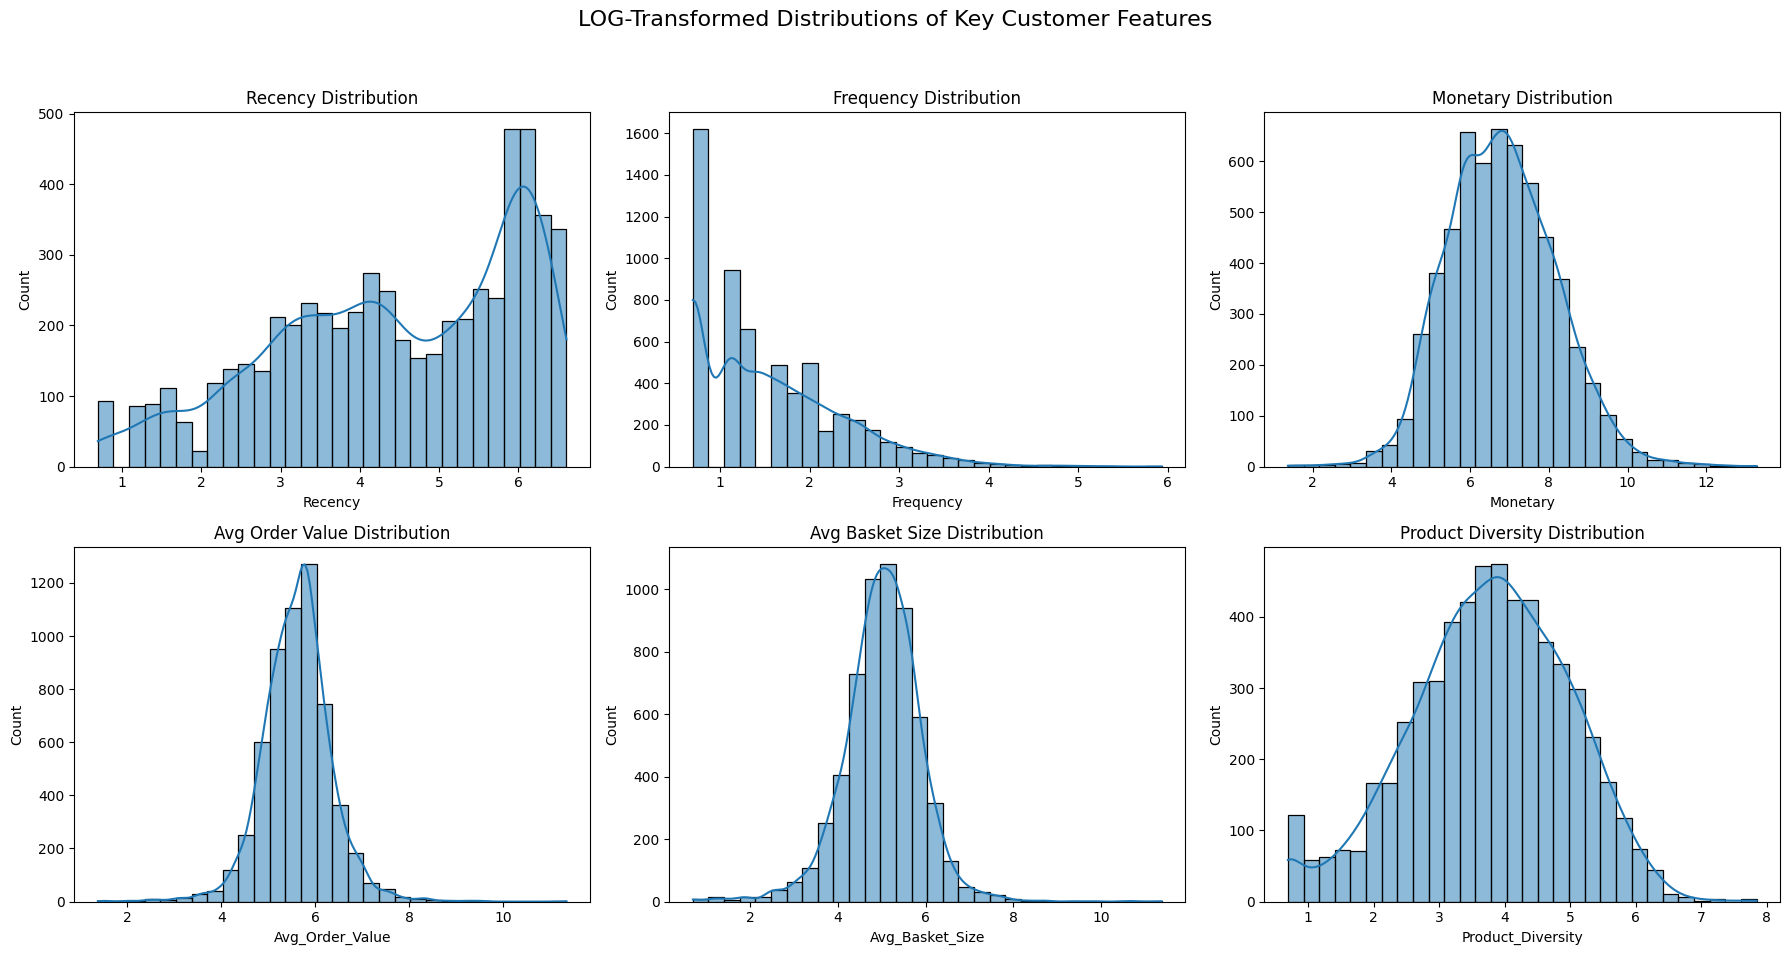

In [112]:
# --- Plot Log-Transformed Distributions (to show the fix) ---
# We use np.log1p (log(1+x)) to handle any potential zero values
print("\n--- Plotting LOG-Transformed Distributions (to check for skew correction) ---")

plt.figure(figsize=(18, 10))
plt.suptitle('LOG-Transformed Distributions of Key Customer Features', fontsize=16)

# Loop through each feature and plot
for i, (feature, title) in enumerate(features, start=1):
    plt.subplot(2, 3, i)
    sns.histplot(np.log1p(rfm_df[feature]), kde=True, bins=30)
    plt.title(title)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Log Transformation of RFM Features**

After observing strong right-skewness in the original RFM distributions, a **log transformation** was applied to reduce the impact of extreme values and bring the data closer to a normal-like distribution.

The plots above show the **log-transformed distributions** of Recency, Frequency, and Monetary:

- The transformation significantly **reduces skewness**, especially for **Frequency** and **Monetary**, producing smoother, more symmetric shapes.  
- **Recency** also becomes more evenly spread, minimizing the effect of customers with extremely long inactivity periods.  

**Justification:**  
These log-transformed features are now **better suited for K-Means clustering**, since the algorithm relies on Euclidean distances that assume roughly uniform feature scales and distributions.  
This transformation ensures that **no single metric dominates** and the resulting clusters reflect genuine behavioral differences among customers.


**Correlation Analysis (Heatmap)**


--- Generating Correlation Heatmap ---


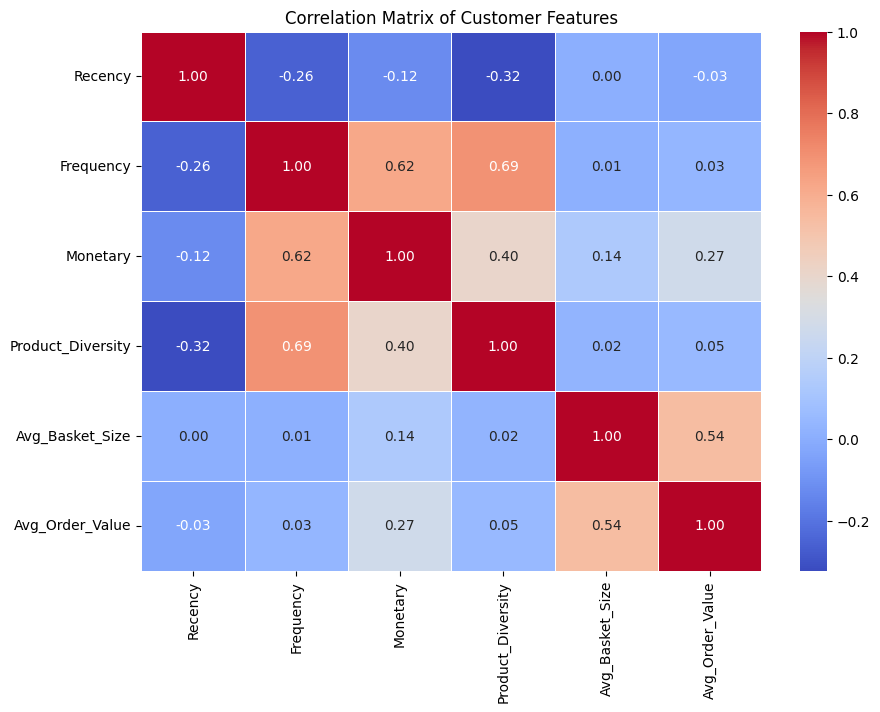

In [113]:
print("\n--- Generating Correlation Heatmap ---")

# Calculate the correlation matrix
corr_matrix = rfm_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            linewidths=0.5, linecolor='white')
plt.title('Correlation Matrix of Customer Features')
plt.show()

**Interpretation & Justification of Correlation Heatmap**

The correlation matrix above highlights the relationships among the RFM metrics:

- **Recency** has a **negative correlation** with both Frequency (-0.26) and Monetary (-0.12).  
  → Customers who purchased recently tend to buy more often and spend more.  
- **Frequency** and **Monetary** are **positively correlated (0.62)**, showing that frequent buyers contribute higher revenue.  
- The correlations are moderate — not too high to cause redundancy, but meaningful enough to indicate related customer behaviors.

**Justification:**  
These results confirm that **all three RFM metrics capture unique yet related behavioral dimensions**, making them suitable and complementary features for **K-Means clustering**.  
They collectively describe how recently, how often, and how much customers purchase — providing a strong foundation for meaningful segmentation.


**Note on EDA Plots:** Histograms, box plots, and a correlation heatmap were generated to understand distributions, outliers, and relationships between features. **Scatter plots and specific time-series plots were deemed not directly applicable at this stage, as the primary focus was on deriving RFM-style features for clustering rather than predicting a specific target variable or analyzing fine-grained temporal trends beyond recency.**

**Feature Scaling (Log Transformation & Standardization)**

In [114]:
# --- 1. Select and Log Transform Features ---
# We select only the features we'll use for clustering
# Let's use the core RFM + Avg_Order_Value and Product_Diversity
features_to_scale = ['Recency', 'Frequency', 'Monetary', 'Avg_Order_Value', 'Product_Diversity', 'Avg_Basket_Size']

# Create a new dataframe for the transformed features
rfm_log_df = pd.DataFrame(index=rfm_df.index)

# Apply log transformation (np.log1p handles 0s)
rfm_log_df['Recency_Log'] = np.log1p(rfm_df['Recency'])
rfm_log_df['Frequency_Log'] = np.log1p(rfm_df['Frequency'])
rfm_log_df['Monetary_Log'] = np.log1p(rfm_df['Monetary'])
rfm_log_df['Avg_Order_Value_Log'] = np.log1p(rfm_df['Avg_Order_Value'])
rfm_log_df['Product_Diversity_Log'] = np.log1p(rfm_df['Product_Diversity'])
rfm_log_df['Avg_Basket_Size_Log'] = np.log1p(rfm_df['Avg_Basket_Size'])

print("--- Log-Transformed Data Head ---")
print(rfm_log_df.head())

# --- 2. Standardize the Transformed Data ---
# K-Means is distance-based, so all features must be on the same scale
scaler = StandardScaler()
scaled_data_array = scaler.fit_transform(rfm_log_df)

# Convert back to a DataFrame
rfm_scaled_df = pd.DataFrame(scaled_data_array, 
                             columns=rfm_log_df.columns, 
                             index=rfm_log_df.index)

print("\n--- Final Scaled Data for Modeling ---")
rfm_scaled_df.head()

--- Log-Transformed Data Head ---
             Recency_Log  Frequency_Log  Monetary_Log  Avg_Order_Value_Log  \
Customer ID                                                                  
12346           5.789960       2.564949     11.258774             8.774010   
12347           1.098612       2.197225      8.501578             6.423557   
12348           4.330733       1.791759      7.414211             5.807181   
12349           2.995732       1.386294      8.210584             7.112515   
12350           5.739793       0.693147      5.688330             5.688330   

             Product_Diversity_Log  Avg_Basket_Size_Log  
Customer ID                                              
12346                     3.332205             8.730919  
12347                     4.844187             5.918558  
12348                     3.218876             6.294897  
12349                     4.927254             6.294035  
12350                     2.833213             5.283204  

--- Final Sc

,Recency_Log,Frequency_Log,Monetary_Log,Avg_Order_Value_Log,Product_Diversity_Log,Avg_Basket_Size_Log
Customer ID,,,,,,
12346,0.861069,1.258817,3.224748,4.329681,-0.361985,4.181370
12347,-2.149516,0.803766,1.226612,1.111936,0.890289,1.014971
12348,-0.075363,0.302011,0.438599,0.268123,-0.455848,1.438686
12349,-0.932075,-0.199743,1.015729,2.055112,0.959087,1.437716
12350,0.828875,-1.057498,-0.812144,0.105417,-0.775266,0.299635


This cell executes the final Feature Engineering/Scaling steps before modeling. It selects five key features, applies the log transformation (np.log1p) to address skew, creating rfm_log_df. Then, it uses StandardScaler to standardize these log-transformed features (scaling them to have zero mean and unit variance), storing the result in rfm_scaled_df. Both log transformation and standardization (Z-score scaling) are crucial for the K-Means algorithm, as it relies on distances between data points. The head of the intermediate log-transformed data and the final scaled data are printed.

**Note on Feature Evaluation (Unsupervised Task): As customer segmentation is an unsupervised task, direct correlation with a target variable is not applicable.<br/> Justification (Not Applicable): The engineered features (Recency, Frequency, Monetary, Average Order Value, Product Diversity) capture distinct aspects of customer purchasing behavior, recency, engagement, and value, as established in marketing theory (RFM) and outlined in the business goals. These features are logically expected to provide meaningful separation between different customer groups, supporting the goal of interpretable segmentation for targeted strategies. The subsequent log transformation and scaling ensure these features are appropriately prepared for distance-based clustering.**

**Note on Feature Selection / Dimensionality Reduction:**
Correlation analysis was performed (heatmap in EDA section). No further feature selection or dimensionality reduction techniques (e.g., PCA) were applied.<br/>**Justification: The 5 selected features (Recency, Frequency, Monetary, Average Order Value, Product Diversity) directly align with the RFM and behavioral metrics specified in the project proposal  and are all considered core drivers for customer segmentation. Given this small, theoretically relevant feature set, further reduction was deemed unnecessary.**

**Note on Categorical Encoding (Not Applicable): The engineered features for clustering are all numerical, so encoding wasn't required for the clustering input.**

**Plotting Scaled Feature Distributions**


--- Plotting Feature Distributions after Sacaling ---


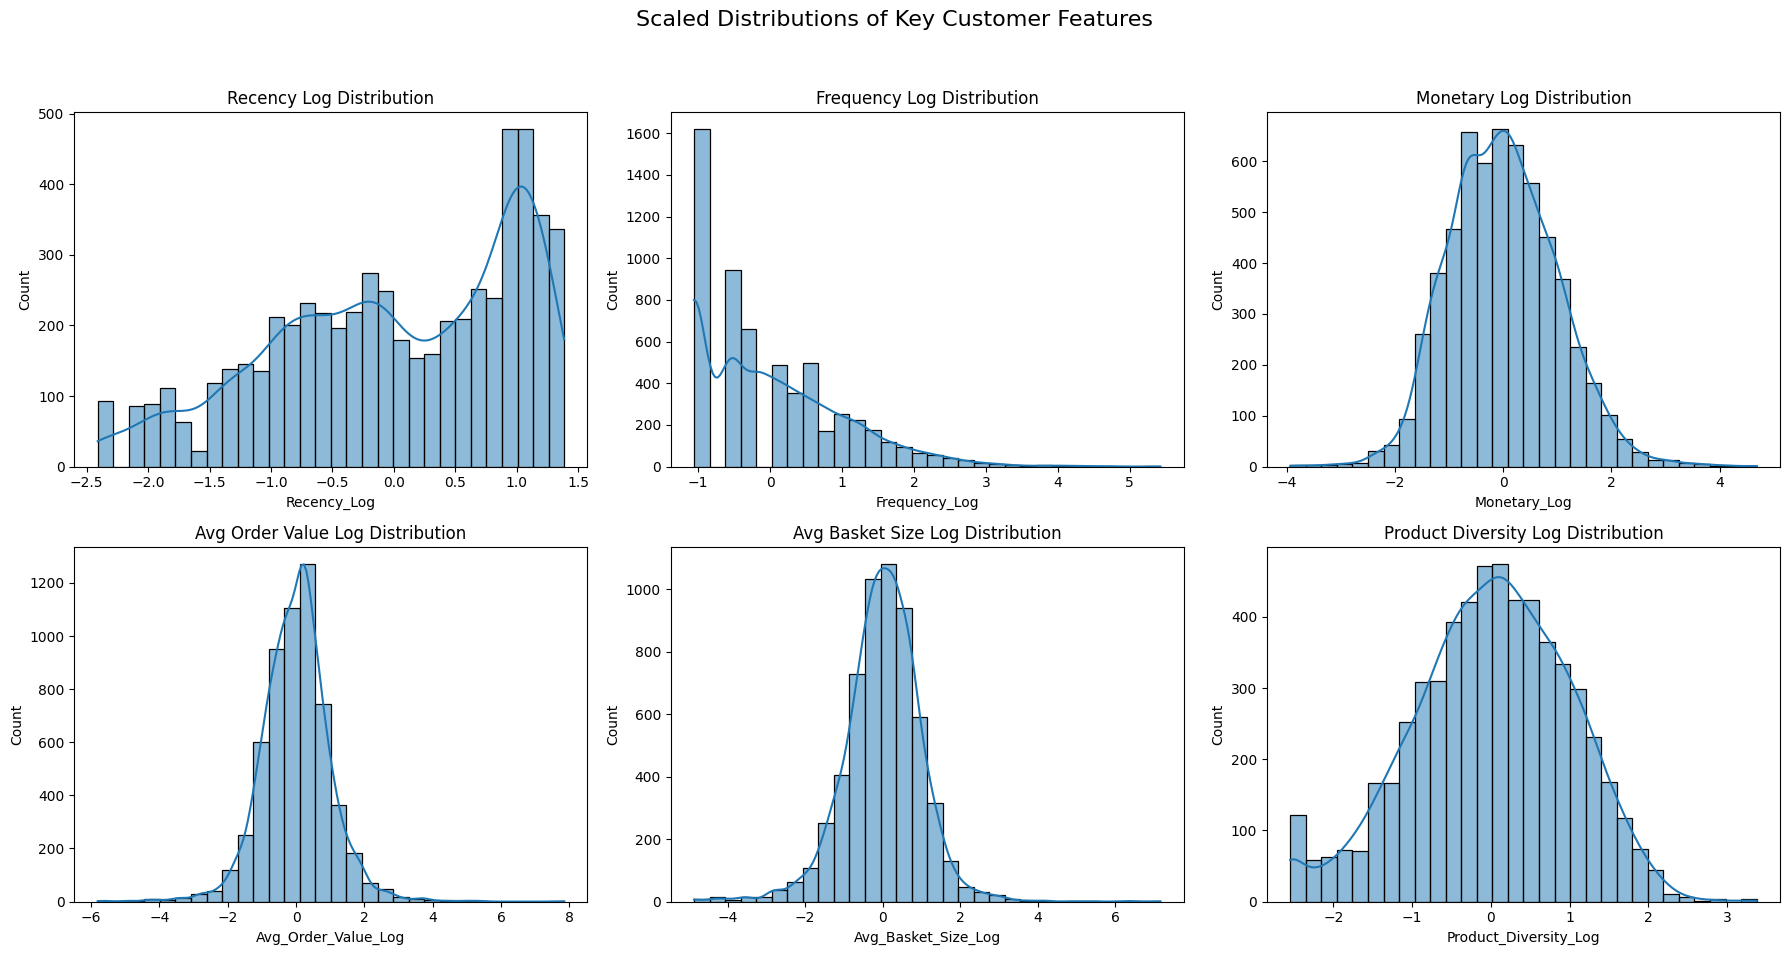

In [115]:
print("\n--- Plotting Feature Distributions after Sacaling ---")

# Define the features and their corresponding titles
features = [
    ('Recency_Log', 'Recency Log Distribution'),
    ('Frequency_Log', 'Frequency Log Distribution'),
    ('Monetary_Log', 'Monetary Log Distribution'),
    ('Avg_Order_Value_Log', 'Avg Order Value Log Distribution'),
    ('Avg_Basket_Size_Log', 'Avg Basket Size Log Distribution'),
    ('Product_Diversity_Log', 'Product Diversity Log Distribution')
]

# Create figure
plt.figure(figsize=(18, 10))
plt.suptitle('Scaled Distributions of Key Customer Features', fontsize=16)

# Loop through each feature and plot
for i, (feature, title) in enumerate(features, start=1):
    plt.subplot(2, 3, i)
    sns.histplot(rfm_scaled_df[feature], kde=True, bins=30)
    plt.title(title)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Finally, this cell provides a visual check of the fully preprocessed data. It plots histograms for the features in the final scaled DataFrame (`rfm_scaled_df`). The plots confirm that the distributions are now centered around zero and have similar variances, indicating that the data scaling process was successful and the data is appropriately prepared for the K-Means clustering in Phase 3.